# Pandas CheatSheet

In [1]:
import numpy as np
import pandas as pd

In [22]:
data={
    'name': ['Alice', 'Bob', 'Charles', 'David', 'Eric'],
    'year': [2017, 2017, 2017, 2017, 2017], 
    'salary': [40000, 24000, 31000, 20000, 30000],
    'pair':[{'a':1},{'a':2},{'a':3},{'a':4},{'a':5}]
}

In [23]:
d=pd.DataFrame(data)
d

,name,pair,salary,year
0,Alice,{'a': 1},40000,2017
1,Bob,{'a': 2},24000,2017
2,Charles,{'a': 3},31000,2017
3,David,{'a': 4},20000,2017
4,Eric,{'a': 5},30000,2017


In [6]:
d.pair

0    {'a': 1}
1    {'a': 2}
2    {'a': 3}
3    {'a': 4}
4    {'a': 5}
Name: pair, dtype: object

In [7]:
type(d.pair)

pandas.core.series.Series

In [9]:
d.pair.tolist()

[{'a': 1}, {'a': 2}, {'a': 3}, {'a': 4}, {'a': 5}]

## 行操作
### 薪水大于30000的人都有谁？

In [11]:
d.query('salary>30000')

,name,pair,salary,year
0,Alice,{'a': 1},40000,2017
2,Charles,{'a': 3},31000,2017


In [13]:
d.salary>30000

0     True
1    False
2     True
3    False
4    False
Name: salary, dtype: bool

In [14]:
# 筛选符合条件
d[d.salary>30000]

,name,pair,salary,year
0,Alice,{'a': 1},40000,2017
2,Charles,{'a': 3},31000,2017


### Eric的信息是什么？

In [15]:
# Pandas如何进行查询？
d.query("name=='Eric'")

,name,pair,salary,year
4,Eric,{'a': 5},30000,2017


In [16]:
d[d.name=='Eric']

,name,pair,salary,year
4,Eric,{'a': 5},30000,2017


In [17]:
d.loc[d.name=='Eric']

,name,pair,salary,year
4,Eric,{'a': 5},30000,2017


### 联合查找：名叫Bob且薪水大于20000

In [18]:
d.query("name=='Bob' and salary>20000")

,name,pair,salary,year
1,Bob,{'a': 2},24000,2017


## 列操作
d.filter

在SQL中经常使用的 SELECT name,year,salary from table 是对二阶张量的行列进行赛选

In [19]:
d.filter(items=['name','salary','pair'])

,name,salary,pair
0,Alice,40000,{'a': 1}
1,Bob,24000,{'a': 2}
2,Charles,31000,{'a': 3}
3,David,20000,{'a': 4}
4,Eric,30000,{'a': 5}


In [20]:
# 简化写法
d[['name','salary']]

,name,salary
0,Alice,40000
1,Bob,24000
2,Charles,31000
3,David,20000
4,Eric,30000


## 模糊查找

In [21]:
d.filter(like='2', axis=0) # 模糊查找行

,name,pair,salary,year
2,Charles,{'a': 3},31000,2017


In [18]:
d.filter(like='ea', axis=1) # 模糊查找列

,year
0,2017
1,2017
2,2017
3,2017
4,2017


## 分组
聚类、分段预测

In [24]:
df1 = pd.DataFrame({
    "Name" : ["Alice", "Ada", "Mallory", "Mallory", "Billy" , "Mallory"],
    "City" : ["Sydney", "Sydney", "Paris", "Sydney", "Sydney", "Paris"]
})

In [25]:
df1

,City,Name
0,Sydney,Alice
1,Sydney,Ada
2,Paris,Mallory
3,Sydney,Mallory
4,Sydney,Billy
5,Paris,Mallory


### 各个城市各有多少人

In [26]:
df1.groupby(['City']).count()

,Name
City,
Paris,2
Sydney,4


## 统计量分析
Numerical 变量的数据分析

In [27]:
d.describe()

,salary,year
count,5.000000,5.0
mean,29000.000000,2017.0
std,7615.773106,0.0
min,20000.000000,2017.0
25%,24000.000000,2017.0
50%,30000.000000,2017.0
75%,31000.000000,2017.0
max,40000.000000,2017.0


## 统计函数

In [69]:
df2 = pd.DataFrame({
    'key1':['a', 'a', 'b', 'b', 'a'],
    'key2':['one', 'two', 'one', 'two', 'one'],
    'data1':np.random.randn(5),
    'data2':np.random.randn(5)
})

In [3]:
df2

,data1,data2,key1,key2
0,-0.453110,2.338225,a,one
1,-1.918583,1.469552,a,two
2,0.338384,-0.387233,b,one
3,-0.981380,1.713030,b,two
4,-0.243838,0.547075,a,one


### 基于属性key1的类型a和b各自的均值是多少？

包括data1和data2但不包括key2

In [4]:
# 没有k2,因为它不是连续型变量
df2.groupby(['key1']).mean()

,data1,data2
key1,,
a,-0.871843,1.451617
b,-0.321498,0.662898


联合Group：'a-one','a-two','b-one','b-two'

In [5]:
# 同时对若干个离散数据 进行分组
df2.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.348474  1.442650
     two  -1.918583  1.469552
b    one   0.338384 -0.387233
     two  -0.981380  1.713030

In [6]:
df2.count() # 每一列中的个数

data1    5
data2    5
key1     5
key2     5
dtype: int64

In [28]:
df2.groupby(['key1']).count() 

,data1,data2,key2
key1,,,
a,3,3,3
b,2,2,2


In [29]:
df2.groupby(['key1', 'key2']).count() 

data1  data2
key1 key2              
a    one       2      2
     two       1      1
b    one       1      1
     two       1      1

### 排序

In [7]:
df2

,data1,data2,key1,key2
0,-0.453110,2.338225,a,one
1,-1.918583,1.469552,a,two
2,0.338384,-0.387233,b,one
3,-0.981380,1.713030,b,two
4,-0.243838,0.547075,a,one


In [8]:
df2.data2.sort_values() # 对列进行排序

2   -0.387233
4    0.547075
1    1.469552
3    1.713030
0    2.338225
Name: data2, dtype: float64

In [32]:
df2.sort_values(by='key2') # 整张表按某1列的数值进行排序

,data1,data2,key1,key2
0,-1.491823,0.084684,a,one
2,0.950192,-0.235840,b,one
4,-0.608515,0.970593,a,one
1,-2.103263,0.432440,a,two
3,0.493304,-0.907539,b,two


### 多属性排序

In [33]:
df2.sort_values(by=['key1','data1']) # 相同再按后面排序

,data1,data2,key1,key2
1,-2.103263,0.432440,a,two
0,-1.491823,0.084684,a,one
4,-0.608515,0.970593,a,one
3,0.493304,-0.907539,b,two
2,0.950192,-0.235840,b,one


In [9]:
df2.sort_values(by=['key2'], ascending=False) # 整张表按某1列数值进行排序

,data1,data2,key1,key2
1,-1.918583,1.469552,a,two
3,-0.981380,1.713030,b,two
0,-0.453110,2.338225,a,one
2,0.338384,-0.387233,b,one
4,-0.243838,0.547075,a,one


# DataFrame对数据的增删查改

## 如何选择某1行

In [23]:
 df2.iloc[0]

data1   -0.45311
data2    2.33823
key1           a
key2         one
Name: 0, dtype: object

In [22]:
df2.iloc[0]['key1']

'a'

In [25]:
df2.loc[0].key1

'a'

In [27]:
df2

,data1,data2,key1,key2
0,-0.453110,2.338225,a,one
1,-1.918583,1.469552,a,two
2,0.338384,-0.387233,b,one
3,-0.981380,1.713030,b,two
4,-0.243838,0.547075,a,one


In [26]:
df2.groupby(['key1']).count()

,data1,data2,key2
key1,,,
a,3,3,3
b,2,2,2


In [28]:
df2.groupby(['key1']).count().iloc[0]

data1    3
data2    3
key2     3
Name: a, dtype: int64

In [29]:
df2.groupby(['key1']).count().loc['a']

data1    3
data2    3
key2     3
Name: a, dtype: int64

## 使用iloc获取Dataframe的某行某列

In [34]:
df2

,data1,data2,key1,key2
0,-0.453110,2.338225,a,one
1,-1.918583,1.469552,a,two
2,0.338384,-0.387233,b,one
3,-0.981380,1.713030,b,two
4,-0.243838,0.547075,a,one


In [36]:
#第1列
df2.iloc[:,0]

0   -0.453110
1   -1.918583
2    0.338384
3   -0.981380
4   -0.243838
Name: data1, dtype: float64

In [32]:
df2.iloc[1,3]

'two'

In [35]:
#Array slice
df2.iloc[:2]

,data1,data2,key1,key2
0,-0.453110,2.338225,a,one
1,-1.918583,1.469552,a,two


In [37]:
df2.iloc[0:-1]

,data1,data2,key1,key2
0,-0.453110,2.338225,a,one
1,-1.918583,1.469552,a,two
2,0.338384,-0.387233,b,one
3,-0.981380,1.713030,b,two


In [33]:
#打印前两行和后2列
df2.iloc[:2, -2:]

,key1,key2
0,a,one
1,a,two


## 数据的修改

### .at[]

In [39]:
df2.at[1,'data1']=2
df2

,data1,data2,key1,key2
0,-0.453110,2.338225,a,one
1,2.000000,1.469552,a,two
2,0.338384,-0.387233,b,one
3,-0.981380,1.713030,b,two
4,-0.243838,0.547075,a,one


### .iat[]

In [41]:
df2.iat[1,1] = -2.0
df2

,data1,data2,key1,key2
0,-0.453110,2.338225,a,one
1,2.000000,-2.000000,a,two
2,0.338384,-0.387233,b,one
3,-0.981380,1.713030,b,two
4,-0.243838,0.547075,a,one


## 增加行

.append()

对于dataframe，每一行事实上代表着一个对象/向量，对于对象/向量的表示，使用json

In [70]:
df3=df2.append({'data1':1.2,'data2':1.4,'key1':'b','key2':'two'},ignore_index=True)
df3

,data1,data2,key1,key2
0,-1.156629,-0.479173,a,one
1,1.252690,1.652271,a,two
2,1.812755,1.407725,b,one
3,-1.132984,-0.462333,b,two
4,1.173084,-1.641891,a,one
5,1.200000,1.400000,b,two


In [71]:
df2

,data1,data2,key1,key2
0,-1.156629,-0.479173,a,one
1,1.252690,1.652271,a,two
2,1.812755,1.407725,b,one
3,-1.132984,-0.462333,b,two
4,1.173084,-1.641891,a,one


In [72]:
# 修改第6行
df3.loc[5]=[2,1, 'c','three']
df3

,data1,data2,key1,key2
0,-1.156629,-0.479173,a,one
1,1.252690,1.652271,a,two
2,1.812755,1.407725,b,one
3,-1.132984,-0.462333,b,two
4,1.173084,-1.641891,a,one
5,2.000000,1.000000,c,three


## 增加列
.assign()

In [73]:
df4=df3.assign(key3=[1,2,3,4,5,6])
df4

,data1,data2,key1,key2,key3
0,-1.156629,-0.479173,a,one,1
1,1.252690,1.652271,a,two,2
2,1.812755,1.407725,b,one,3
3,-1.132984,-0.462333,b,two,4
4,1.173084,-1.641891,a,one,5
5,2.000000,1.000000,c,three,6


In [74]:
# 修改1列
df4.loc[:,'key3']=np.random.randn(6)
df4

,data1,data2,key1,key2,key3
0,-1.156629,-0.479173,a,one,0.140732
1,1.252690,1.652271,a,two,1.357048
2,1.812755,1.407725,b,one,-1.065623
3,-1.132984,-0.462333,b,two,-0.589690
4,1.173084,-1.641891,a,one,0.117112
5,2.000000,1.000000,c,three,-0.683054


# DataFrame自带绘图

In [75]:
# 发表论文篇数
data3 = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3]}
df3 = pd.DataFrame(data3, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df3

,name,reports,year
Cochice,Jason,4,2012
Pima,Molly,24,2012
Santa Cruz,Tina,31,2013
Maricopa,Jake,2,2014
Yuma,Amy,3,2014


In [11]:
df3['reports']

Cochice        4
Pima          24
Santa Cruz    31
Maricopa       2
Yuma           3
Name: reports, dtype: int64

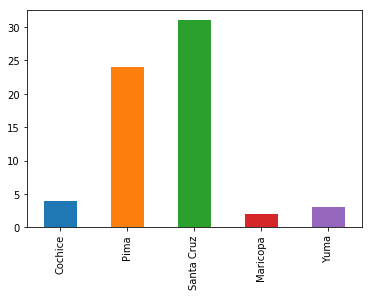

In [16]:
df3['reports'].plot.bar()

In [15]:
# %matplotlib inline

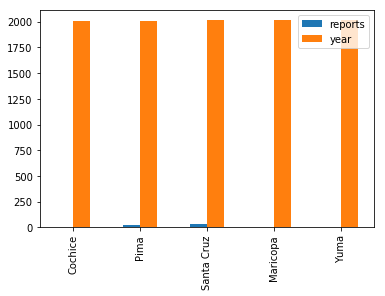

In [18]:
# 绘图过滤离散型数据
df3.plot.bar()

In [19]:
df3

,name,reports,year
Cochice,Jason,4,2012
Pima,Molly,24,2012
Santa Cruz,Tina,31,2013
Maricopa,Jake,2,2014
Yuma,Amy,3,2014


## 密度估计

核密度估计

In [20]:
import seaborn as sns

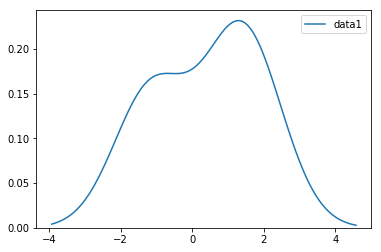

In [76]:
sns.kdeplot(df2['data1'])

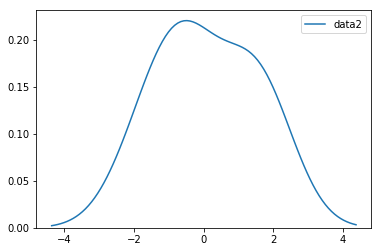

In [77]:
sns.kdeplot(df2['data2'])

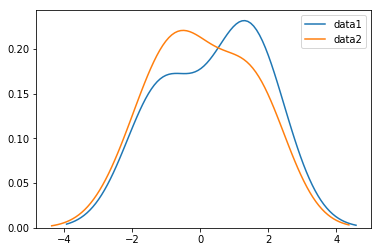

In [78]:
sns.kdeplot(df2['data1'])
sns.kdeplot(df2['data2'])

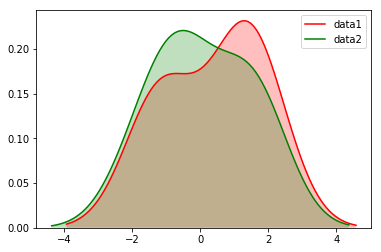

In [79]:
sns.kdeplot(df2['data1'], shade=True, color='r')
sns.kdeplot(df2['data2'], shade=True, color='g')

## 生成一段数据，并进行核密度估计

In [66]:
x=np.random.rand(5000)

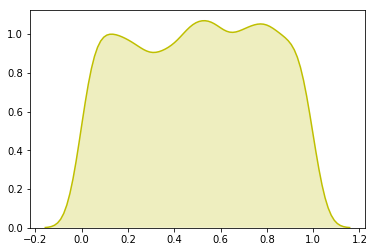

In [67]:
sns.kdeplot(x, shade=True, color='y')

In [68]:
type(x)

numpy.ndarray